In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame, Series

In [23]:
np.random.seed(201707282)

n0,mu0,variance0 = 200,[10,11],20
data0 = multivariate_normal(mu0,np.eye(2)*variance0,n0)
df0 = DataFrame(data0, columns=['x','y'])
df0['t'] = 0

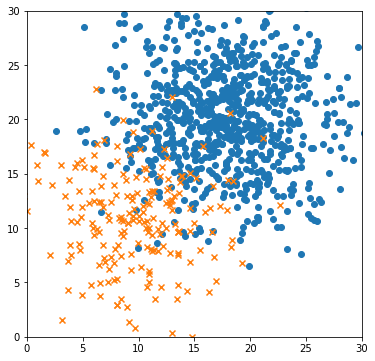

In [24]:
n0,mu0,variance0 = 800,[18,20],22
data1 = multivariate_normal(mu0,np.eye(2)*variance0,n0)
df1 = DataFrame(data1, columns=['x','y'])
df1['t'] = 1
fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_xlim([0,30])
subplot.set_ylim([0,30])
subplot.scatter(data1[:,0],data1[:,1],marker='o')
subplot.scatter(data0[:,0],data0[:,1],marker='x')

In [25]:
df = pd.concat([df0, df1], ignore_index=True)
df = df.reindex(permutation(df.index)).reset_index(drop=True) # ランダムに並べ替えして再番号付け

In [29]:
# ２割を学習データ、残りをテストデータとする。
num_data = int(len(df)*0.2)
train_set = df[:num_data]
test_set = df[num_data:]
train_x = train_set[['x','y']].as_matrix()
train_t = train_set[['t']].as_matrix()
test_x = test_set[['x','y']].as_matrix()
test_t = test_set[['t']].as_matrix() 

In [30]:
x = tf.placeholder(tf.float32,[None,2])
w = tf.Variable(tf.zeros([2,1]))
w0 = tf.Variable(tf.zeros([1]))
f = tf.matmul(x,w) + w0
p = tf.sigmoid(f)

In [39]:
t = tf.placeholder(tf.float32,[None,1])
loss = -tf.reduce_sum(t*tf.log(p) + (1-t)*tf.log(1-p))
loss2 = tf.reduce_sum(tf.square(p-t))
train_step = tf.train.AdamOptimizer().minimize(loss)
train_step2 = tf.train.AdamOptimizer().minimize(loss2)

In [40]:
correct_prediction = tf.equal(tf.sign(p-0.5),tf.sign(t-0.5))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [41]:
sess = tf.Session()
#sess.run(tf.initialize_all_variables())   # 古い書き方
sess.run(tf.global_variables_initializer()) # 変数の初期化

In [42]:
train_accuracy = []
test_accuracy = []

In [43]:
for _ in range(10000):
    sess.run(train_step, feed_dict={x:train_x,t:train_t})
    acc_val = sess.run(accuracy, feed_dict={x:train_x,t:train_t})
    train_accuracy.append(acc_val)
    acc_val = sess.run(accuracy, feed_dict={x:test_x,t:test_t})
    test_accuracy.append(acc_val)

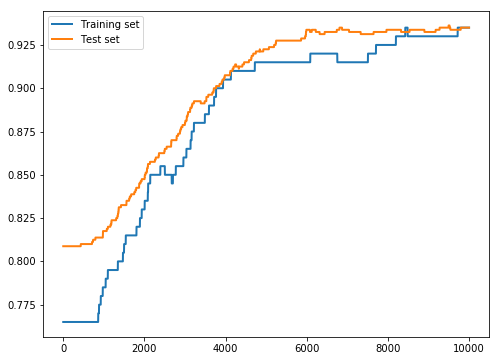

In [44]:
fig = plt.figure(figsize=(8,6))
subplot = fig.add_subplot(1,1,1)
subplot.plot(range(len(train_accuracy)), train_accuracy, linewidth=2, label='Training set')
subplot.plot(range(len(test_accuracy)), test_accuracy, linewidth=2, label='Test set')
subplot.legend(loc='upper left')

In [45]:
sess = tf.Session()
#sess.run(tf.initialize_all_variables())   # 古い書き方
sess.run(tf.global_variables_initializer()) # 変数の初期化

In [46]:
train_accuracy = []
test_accuracy = []
for _ in range(10000):
    sess.run(train_step2, feed_dict={x:train_x,t:train_t})
    acc_val = sess.run(accuracy, feed_dict={x:train_x,t:train_t})
    train_accuracy.append(acc_val)
    acc_val = sess.run(accuracy, feed_dict={x:test_x,t:test_t})
    test_accuracy.append(acc_val)

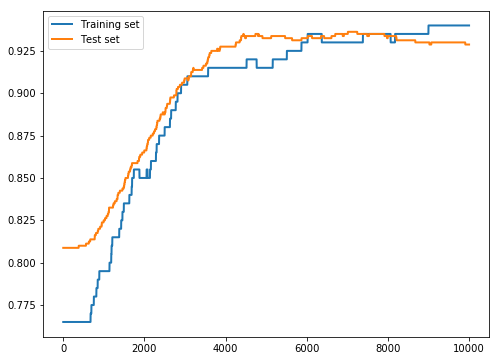

In [47]:
fig = plt.figure(figsize=(8,6))
subplot = fig.add_subplot(1,1,1)
subplot.plot(range(len(train_accuracy)), train_accuracy, linewidth=2, label='Training set')
subplot.plot(range(len(test_accuracy)), test_accuracy, linewidth=2, label='Test set')
subplot.legend(loc='upper left')

## 考察
収束は早いのだが、学習が進んでいくと、いったん上がった正答率がいったん上がったのちに下がりだす。
これは過学習が起こっていると考えてよい。